# Отток клиентов

Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Нужно построить модель с предельно большим значением *F1*-меры. Минимальное значение метрики должно быть 0.59. *F1*-мера будет считаться на тестовой выборке.

Дополнительно нужно измерить *AUC-ROC*, и сравнить её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных,-просмотр-информации" data-toc-modified-id="Загрузка-данных,-просмотр-информации-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных, просмотр информации</a></span></li><li><span><a href="#Заполнение-пропусков-и-изменение-типов-данных" data-toc-modified-id="Заполнение-пропусков-и-изменение-типов-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Заполнение пропусков и изменение типов данных</a></span></li><li><span><a href="#Разделение-на-выборки,-масштабирование-признаков-и-удаление-лишних-признаков" data-toc-modified-id="Разделение-на-выборки,-масштабирование-признаков-и-удаление-лишних-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на выборки, масштабирование признаков и удаление лишних признаков</a></span></li><li><span><a href="#Кодирование-категориальных-признаков-через-OneHotEncoder" data-toc-modified-id="Кодирование-категориальных-признаков-через-OneHotEncoder-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Кодирование категориальных признаков через OneHotEncoder</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Модели-без-учёта-дизбаланса-классов" data-toc-modified-id="Модели-без-учёта-дизбаланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модели без учёта дизбаланса классов</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier()" data-toc-modified-id="DecisionTreeClassifier()-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><code>DecisionTreeClassifier()</code></a></span></li><li><span><a href="#RandomForestClassifier()" data-toc-modified-id="RandomForestClassifier()-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span><code>RandomForestClassifier()</code></a></span></li><li><span><a href="#LogisticRegression()" data-toc-modified-id="LogisticRegression()-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span><code>LogisticRegression()</code></a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Устранение-дизбаланса-классов-алгоритмом-SMOTE" data-toc-modified-id="Устранение-дизбаланса-классов-алгоритмом-SMOTE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Устранение дизбаланса классов алгоритмом SMOTE</a></span></li><li><span><a href="#Устранение-дисбаланса-классов-с-помощью-RandomUnderSampler" data-toc-modified-id="Устранение-дисбаланса-классов-с-помощью-RandomUnderSampler-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Устранение дисбаланса классов с помощью RandomUnderSampler</a></span></li><li><span><a href="#Проверка-моделей-после-устранения-дисбаланса-классов" data-toc-modified-id="Проверка-моделей-после-устранения-дисбаланса-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка моделей после устранения дисбаланса классов</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier()" data-toc-modified-id="DecisionTreeClassifier()-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span><code>DecisionTreeClassifier()</code></a></span></li><li><span><a href="#RandomForestClassifier()" data-toc-modified-id="RandomForestClassifier()-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span><code>RandomForestClassifier()</code></a></span></li><li><span><a href="#LogisticRegression()" data-toc-modified-id="LogisticRegression()-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span><code>LogisticRegression()</code></a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Лучшая-модель-на-тестовых-данных." data-toc-modified-id="Лучшая-модель-на-тестовых-данных.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Лучшая модель на тестовых данных.</a></span></li><li><span><a href="#AUC-ROC" data-toc-modified-id="AUC-ROC-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>AUC-ROC</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
pip install -U imbalanced-learn

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, f1_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Загрузка данных, просмотр информации

Загрузим данные в переменную `data`. Выведем основную информацию.

In [3]:
data = pd.read_csv('churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце `'Tenure'` есть 909 пропусков. Их нужно будет обработать.

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Приведём названия всех столбцов к snake_case:

In [6]:
columns = {
    'RowNumber': 'row_number',
    'CustomerId': 'customer_id',
    'Surname': 'surname',
    'CreditScore': 'credit_score',
    'Geography': 'geography',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'num_of_products',
    'HasCrCard': 'has_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'exited'
}

In [7]:
data = data.rename(columns=columns)
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products',
       'has_credit_card', 'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

### Заполнение пропусков и изменение типов данных

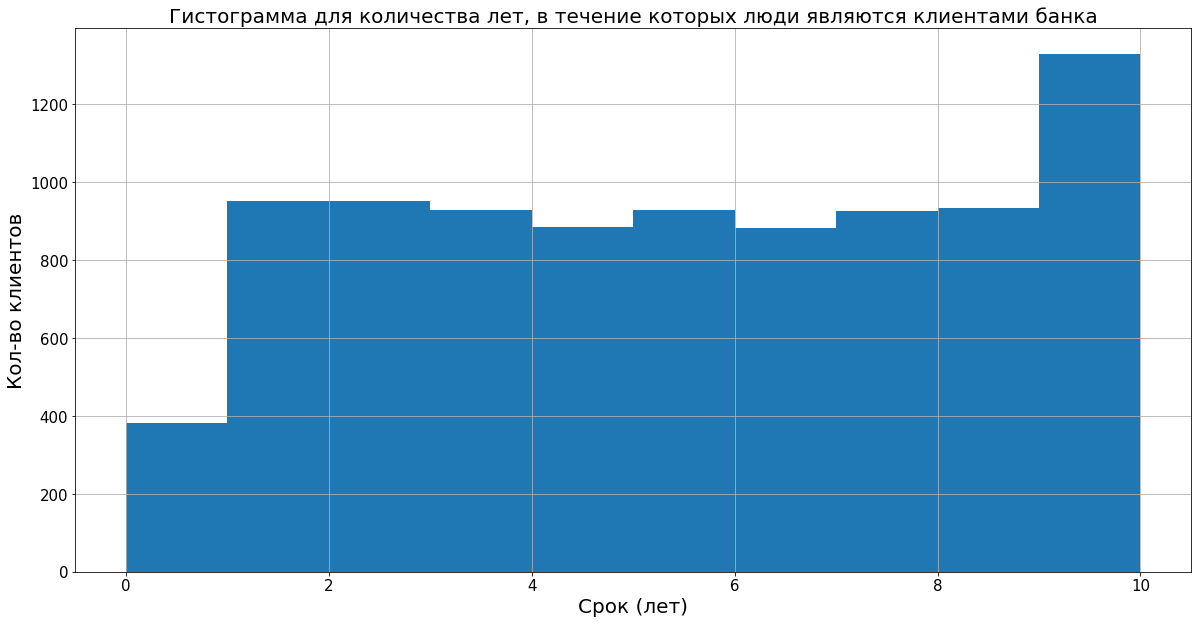

In [8]:
data['tenure'].hist(figsize=(20, 10)).tick_params(labelsize=15)
plt.title('Гистограмма для количества лет, в течение которых люди являются клиентами банка', fontsize=20)
plt.ylabel('Кол-во клиентов', fontsize=20)
plt.xlabel('Срок (лет)', fontsize=20);

Заполним пропуски в столбце `'tenure'` средним значением по каждой из возрастных групп, с шагом в 10 лет.

In [9]:
for age in range(20, 101, 10):
    data.loc[(data['age'] <= age) & (data['tenure'].isna()), ['tenure']] = \
    int(data.loc[(data['age'] <= age) & (data['age'] > age - 10)]['tenure'].mean())
    
data['tenure'].isna().sum()

0

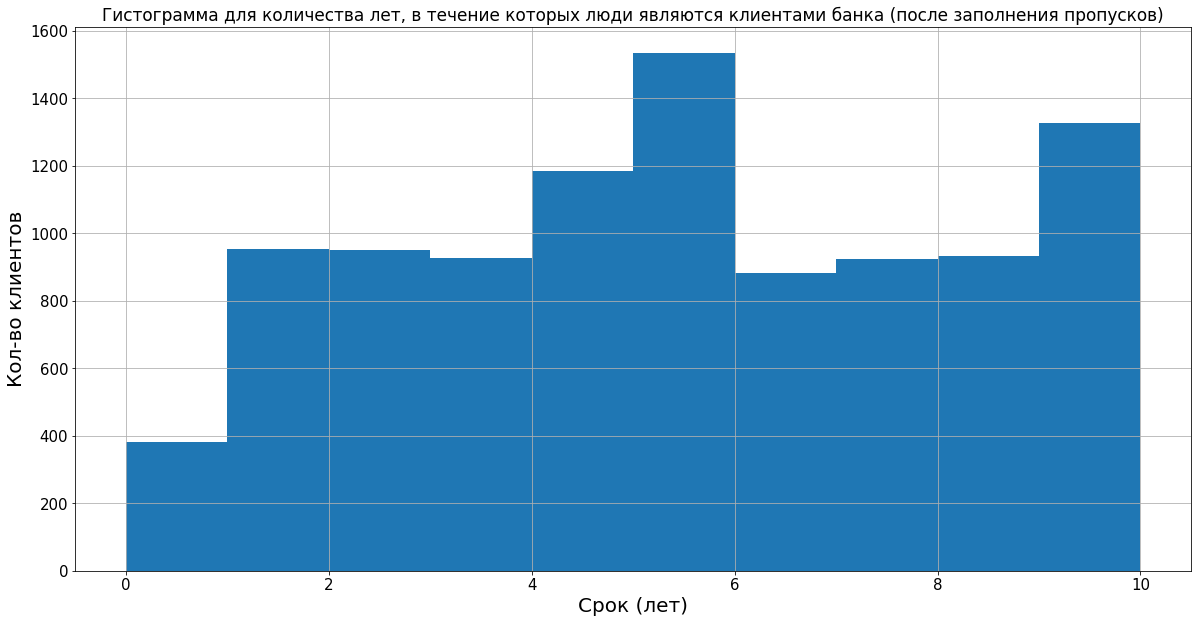

In [10]:
data['tenure'].hist(figsize=(20, 10)).tick_params(labelsize=15)
plt.title('Гистограмма для количества лет, в течение которых люди являются клиентами банка (после заполнения пропусков)', fontsize=17)
plt.ylabel('Кол-во клиентов', fontsize=20)
plt.xlabel('Срок (лет)', fontsize=20);

По гистограмме видим, что большинство пропусков заполнилось значениями 4 и 5.

Поменяем тип данных в столбцах `'tenure'`, `'estimated_salary'` и `'balance'` на целочисленный: копейки в доходе и балансе не должны повлиять на результат.

In [11]:
for col in ['tenure', 'estimated_salary', 'balance']:
    data[col] = data[col].round().astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   row_number        10000 non-null  int64 
 1   customer_id       10000 non-null  int64 
 2   surname           10000 non-null  object
 3   credit_score      10000 non-null  int64 
 4   geography         10000 non-null  object
 5   gender            10000 non-null  object
 6   age               10000 non-null  int64 
 7   tenure            10000 non-null  int64 
 8   balance           10000 non-null  int64 
 9   num_of_products   10000 non-null  int64 
 10  has_credit_card   10000 non-null  int64 
 11  is_active_member  10000 non-null  int64 
 12  estimated_salary  10000 non-null  int64 
 13  exited            10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


### Разделение на выборки, масштабирование признаков и удаление лишних признаков

Избавимся от столбцов `'row_number'`, `'customer_id'`, `'surname'`. Очевидно, что номер строки, личный id клиента и его фамилия никак не помогут модели предсказать целевой признак.

In [12]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

Разделим выборку на тренировочную, валидационную и тестовую в соотношении 3:1:1. Выведем размер выборок.

In [13]:
target = data['exited']
features = data.drop('exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=322, stratify=target)

features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=322, stratify=target_train)

print('Размер тренировочной выборки:', features_train.shape)
print('Размер валидационной выборки:', features_valid.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер тренировочной выборки: (6000, 10)
Размер валидационной выборки: (2000, 10)
Размер тестовой выборки: (2000, 10)


Стандартизируем все оставшиеся целочисленные признаки через `StandartScaler()`. Обратим внимание, что `'has_credit_card'` и `'is_active_member'`это не числовые признаки, а бинарные, поэтому их можно не стандартизировать.

In [14]:
pd.options.mode.chained_assignment = None

num_columns = (features_train
               .select_dtypes('int64')
               .drop(['has_credit_card', 'is_active_member'], axis=1)
               .columns)

scaler = StandardScaler()
scaler.fit(features_train[num_columns])

features_train[num_columns] = scaler.transform(features_train[num_columns])
features_valid[num_columns] = scaler.transform(features_valid[num_columns])
features_test[num_columns] = scaler.transform(features_test[num_columns])

In [15]:
features_train.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary
8661,1.268638,Germany,Female,-0.270271,-0.358715,0.468068,-0.905814,0,1,-1.657394
413,0.442654,Germany,Female,0.213710,-0.358715,1.678287,2.552593,1,1,1.536317
7893,-0.083911,France,Male,0.116914,1.090151,0.521870,-0.905814,1,0,-0.814602
456,0.855646,France,Male,-0.560660,-0.720932,-1.226499,-0.905814,1,1,-1.600457
1135,0.855646,Germany,Male,-0.754252,0.365718,1.299383,0.823389,0,0,1.363453


### Кодирование категориальных признаков через OneHotEncoder

Закодируем признаки `'gender'` и `'geography'` с помощью OHE. С помощью параметра `drop='first'` удалим первый столбец, чтобы избежать дамми-ловушки.

In [16]:
cat_columns = features_train.select_dtypes('object').columns

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(features_train[cat_columns]) #создаём и обучаем кодер 

OneHotEncoder(drop='first', sparse=False, sparse_output=False)

In [17]:
#ф-ия, которая принимает в себя датафрейм и кодирует нужные нам категориальные признаки
def ohe_coder(df):
    data_ohe = ohe.transform(df[cat_columns])
    data_ohe = pd.DataFrame(data_ohe, columns=ohe.get_feature_names_out())
    
    df.reset_index(drop=True, inplace=True)
    df[ohe.get_feature_names_out()] = data_ohe
    df.drop(columns=cat_columns, inplace=True)

In [18]:
#применим функцию к тренировочной, валидационной и тестовой выборке
ohe_coder(features_train)
ohe_coder(features_valid)
ohe_coder(features_test)

Проверим, что данные закодировались корректно:

In [19]:
features_train.head(3)

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,1.268638,-0.270271,-0.358715,0.468068,-0.905814,0,1,-1.657394,1.0,0.0,0.0
1,0.442654,0.213710,-0.358715,1.678287,2.552593,1,1,1.536317,1.0,0.0,0.0
2,-0.083911,0.116914,1.090151,0.521870,-0.905814,1,0,-0.814602,0.0,0.0,1.0


In [20]:
features_valid.head(3)

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,-0.021963,-0.367067,0.727934,-1.226499,0.823389,1,1,-0.368992,0.0,1.0,1.0
1,0.308431,-0.270271,-0.720932,0.634805,-0.905814,1,1,-0.623745,0.0,0.0,1.0
2,-0.011638,1.278468,1.090151,-0.440293,-0.905814,1,0,-1.005493,0.0,0.0,0.0


In [21]:
features_test.head(3)

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,-0.145860,-0.173475,-1.445364,0.616588,-0.905814,1,0,-0.820588,0.0,1.0,1.0
1,-1.033793,-0.560660,1.452367,-0.061325,-0.905814,1,1,0.069031,0.0,1.0,0.0
2,1.516433,1.956041,-0.358715,0.843642,-0.905814,1,1,-0.104685,0.0,1.0,1.0


In [22]:
features_train.info()
print()
features_valid.info()
print()
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       6000 non-null   float64
 1   age                6000 non-null   float64
 2   tenure             6000 non-null   float64
 3   balance            6000 non-null   float64
 4   num_of_products    6000 non-null   float64
 5   has_credit_card    6000 non-null   int64  
 6   is_active_member   6000 non-null   int64  
 7   estimated_salary   6000 non-null   float64
 8   geography_Germany  6000 non-null   float64
 9   geography_Spain    6000 non-null   float64
 10  gender_Male        6000 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 515.8 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_s

Признаки закодировались корректно, пропусков в данных нет, всё в порядке.

## Исследование задачи

### Исследование баланса классов

Построим гистограмму, чтобы узнать насколько сбалансированы классы:

In [23]:
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

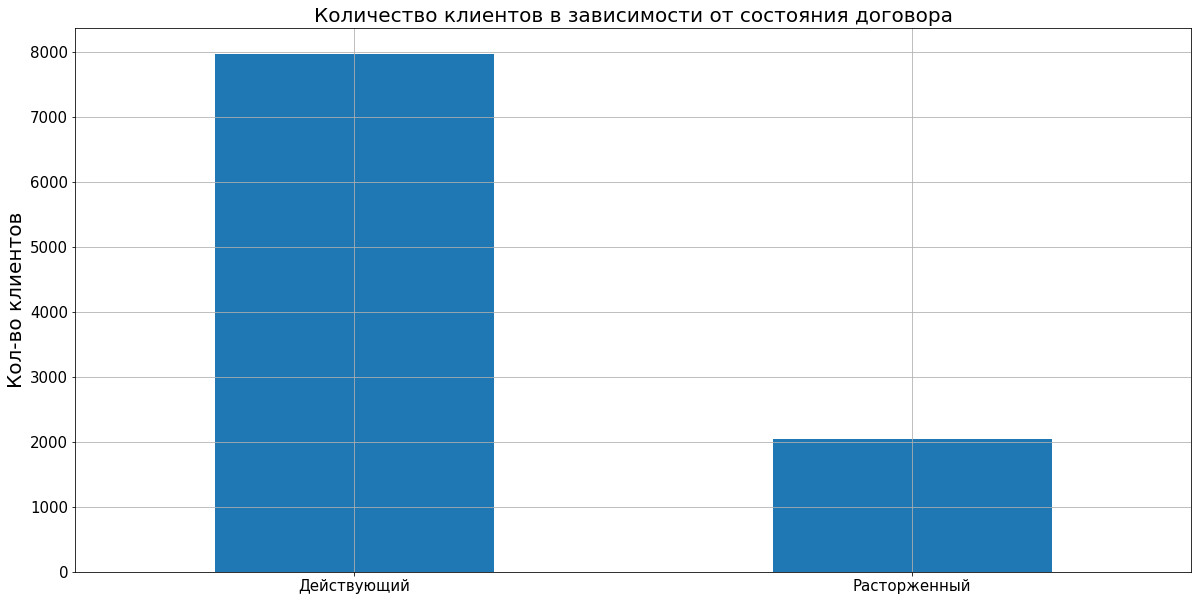

In [24]:
p = data['exited'].value_counts().plot(kind='bar', grid=True, figsize=(20, 10))
p.set_xticks([0, 1], labels=['Действующий', 'Расторженный'], fontsize=15, rotation=0)
plt.yticks(fontsize=15)
plt.title('Количество клиентов в зависимости от состояния договора', fontsize=20)
plt.ylabel('Кол-во клиентов', fontsize=20);

По гистограмме видим, что клиентов оставшихся в банке примерно в 4 раза больше, чем ушедших: 7963 против 2037. В выборках, которые образовались после разделения, соотношение классов такое же, так как при разделении был указан параметр `stratify`.

### Модели без учёта дизбаланса классов

Обучим три модели с перебором гиперпараметров в цикле, сохраним лучшую модель, и выведем лучшие параметры и метрику для каждой. 

Так как модели придётся обучать несколько раз на разных датасетах, напишем три функции для решающего дерева, случайного леса и логистической регрессии. Функции будут принимать в себя тренировочные и тестовые признаки и целевой признак. Функция сохраняет в переменную лучшую модель, выводит гиперпараметры лучшей модели и интересующие нас метрики.

#### `DecisionTreeClassifier()`

In [25]:
# глобальные переменные для лучшего значения метрики f1 и сохранения самой лучшей модели
best_tree_f1_score = 0
best_tree_model = None

In [26]:
def tree(x_train, y_train, x_test, y_test):
    global best_tree_f1_score, best_tree_model
    
    best_score = 0
    best_tree_depth = None
    best_model = None
    
    for depth in range(2, 20):
        model = DecisionTreeClassifier(random_state=322, max_depth=depth)
        model.fit(x_train, y_train)
        test_predictions = model.predict(x_test)
        score = f1_score(y_test, test_predictions)
        probabilities_one_test = model.predict_proba(x_test)[:, 1]
        
        if score > best_score:
            if score > best_tree_f1_score:
                best_tree_f1_score = score
                best_tree_model = model
            best_score = score
            best_model = model
            best_tree_depth = depth
            auc_roc = roc_auc_score(y_test, probabilities_one_test)
    
    print('DescisionTreeClassifier:\n')        
    print(f'Лучшая глубина дерева: {best_tree_depth}')
    print(f'Лучшая метрика F1: {best_score}')
    print(f'Метрика AUC-ROC {auc_roc}')

In [27]:
tree(features_train, target_train, features_valid, target_valid)

DescisionTreeClassifier:

Лучшая глубина дерева: 5
Лучшая метрика F1: 0.5669515669515669
Метрика AUC-ROC 0.8430256142120549


#### `RandomForestClassifier()`

In [28]:
best_forest_f1_score = 0
best_forest_model = None

In [29]:
def forest(x_train, y_train, x_test, y_test):
    global best_forest_f1_score, best_forest_model
    
    best_score = 0
    best_forest_depth = None
    best_model = None
    best_forest_est = None
    
    for est in range(5, 101, 5):
        for depth in range(2, 20):
            model = RandomForestClassifier(random_state=322, max_depth=depth, n_estimators=est)
            model.fit(x_train, y_train)
            test_predictions = model.predict(x_test)
            score = f1_score(y_test, test_predictions)
            probabilities_one_test = model.predict_proba(x_test)[:, 1]
            
            if score > best_score:
                if score > best_forest_f1_score:
                    best_forest_f1_score = score
                    best_forest_model = model
                best_score = score
                best_model = model
                best_forest_depth = depth
                best_forest_est = est
                auc_roc = roc_auc_score(y_test, probabilities_one_test)
    
    print('RandomForestClassificator:\n')
    print(f'Лучшая глубина дерева в лесу: {best_forest_depth}')
    print(f'Лучшее кол-во деревьев: {best_forest_est}')
    print(f'Лучшая метрика F1 {best_score}')
    print(f'Метрика AUC-ROC {auc_roc}')

In [30]:
forest(features_train, target_train, features_valid, target_valid)

RandomForestClassificator:

Лучшая глубина дерева в лесу: 13
Лучшее кол-во деревьев: 15
Лучшая метрика F1 0.5943536404160475
Метрика AUC-ROC 0.8451425231086247


#### `LogisticRegression()`

In [31]:
best_regression_f1_score = 0
best_regression_model = None 

In [32]:
def log_regression(x_train, y_train, x_test, y_test):
    global best_regression_f1_score, best_regression_model
    
    best_score = 0
    best_regression_iter = None
    best_model = None
    
    for it in range(10, 1000, 10):
        model = LogisticRegression(random_state=322, max_iter=it, solver='liblinear')
        model.fit(x_train, y_train)
        test_predictions = model.predict(x_test)
        score = f1_score(y_test, test_predictions)
        probabilities_one_test = model.predict_proba(x_test)[:, 1]
        
        if score > best_score:
            if score > best_regression_f1_score:
                best_regression_f1_score = score
                best_regression_model = model
            best_score = score
            best_model = model
            best_regression_iter = it
            auc_roc = roc_auc_score(y_test, probabilities_one_test)
    
    print('LogisticRegression:\n')
    print(f'Количество итераций в лучшей модели: {best_regression_iter}')
    print(f'Лучшая метрика F1: {best_score}')
    print(f'Метрика AUC-ROC {auc_roc}')

In [33]:
log_regression(features_train, target_train, features_valid, target_valid)

LogisticRegression:

Количество итераций в лучшей модели: 10
Лучшая метрика F1: 0.3256637168141593
Метрика AUC-ROC 0.764093831890442


Лучшую метрику продемонстрировала модель случайного леса. Даже без учёта дизбаланса классов удалось подобрать такие гиперпараметры, что целевое значение метрики было достигнуто. Осталось побороть дизбаланс и получить такую же метрику на тестовой выборке.

## Борьба с дисбалансом

### Устранение дизбаланса классов алгоритмом SMOTE

Сделаем апсемплинг выборки с помощью алгоритма SMOTE. Выведем распределение классов после семплинга:

In [34]:
features_train_smote, target_train_smote = (SMOTE(random_state=322)
                                                    .fit_resample(features_train, target_train))
print(f'Распределение классов в изначальной выборке:\n0 - {target_train.value_counts()[0]}\n1 - {target_train.value_counts()[1]}\n')
print(f'Распределение классов в "апсемплированной" выборке:\n0 - {target_train_smote.value_counts()[0]}\n1 - {target_train_smote.value_counts()[1]}')


Распределение классов в изначальной выборке:
0 - 4777
1 - 1223

Распределение классов в "апсемплированной" выборке:
0 - 4777
1 - 4777


### Устранение дисбаланса классов с помощью RandomUnderSampler

In [35]:
ros = RandomUnderSampler(random_state=322)
features_train_undersampled, target_train_undersampled = (ros
                                                          .fit_resample(
                                                              features_train, target_train))

print(f'Распределение классов в изначальной выборке:\n0 - {target_train.value_counts()[0]}\n1 - {target_train.value_counts()[1]}\n')
print(f'Распределение классов в "апсемплированной" выборке:\n0 - {target_train_undersampled.value_counts()[0]}\n1 - {target_train_undersampled.value_counts()[1]}')

Распределение классов в изначальной выборке:
0 - 4777
1 - 1223

Распределение классов в "апсемплированной" выборке:
0 - 1223
1 - 1223


### Проверка моделей после устранения дисбаланса классов

Повторим такое же обучение моделей с перебором гиперпараметров в цикле. Только теперь будем использовать семплированные двумя методами выборки для обучения.

#### `DecisionTreeClassifier()`

SMOTE:

In [36]:
tree(features_train_smote, target_train_smote, features_valid, target_valid)

DescisionTreeClassifier:

Лучшая глубина дерева: 5
Лучшая метрика F1: 0.5912240184757506
Метрика AUC-ROC 0.8355643779372592


Undersampling:

In [37]:
tree(features_train_undersampled, target_train_undersampled, features_valid, target_valid)

DescisionTreeClassifier:

Лучшая глубина дерева: 3
Лучшая метрика F1: 0.568207440811725
Метрика AUC-ROC 0.8052004238444918


#### `RandomForestClassifier()`

SMOTE:

In [38]:
forest(features_train_smote, target_train_smote, features_valid, target_valid)

RandomForestClassificator:

Лучшая глубина дерева в лесу: 10
Лучшее кол-во деревьев: 35
Лучшая метрика F1 0.6099290780141843
Метрика AUC-ROC 0.8492514085734425


Undersampling:

In [39]:
forest(features_train_undersampled, target_train_undersampled, features_valid, target_valid)

RandomForestClassificator:

Лучшая глубина дерева в лесу: 9
Лучшее кол-во деревьев: 40
Лучшая метрика F1 0.6146703806870938
Метрика AUC-ROC 0.8589591131964013


#### `LogisticRegression()`

SMOTE:

In [40]:
log_regression(features_train_smote, target_train_smote, features_valid, target_valid)

LogisticRegression:

Количество итераций в лучшей модели: 10
Лучшая метрика F1: 0.4845814977973568
Метрика AUC-ROC 0.7604939299854554


Undersampling:

In [41]:
log_regression(features_train_undersampled, target_train_undersampled, features_valid, target_valid)

LogisticRegression:

Количество итераций в лучшей модели: 10
Лучшая метрика F1: 0.49956933677863913
Метрика AUC-ROC 0.7672788350754454


После борьбы с дисбалансом классов метрика выросла на всех моделях. Теперь целевого значения метрика достигает и на модели одиночного дерева. Лучшей моделью стал случайный лес, который обучился на андерсемплированных данных. В этой модели метрика достигла 0.61 при работе с валидационной выборкой. Второй по качеству моделью, также является случайный лес, но который обучался на данных, апсемплированных методом SMOTE. В ней метрика практически достигла 0.61.

## Тестирование модели

### Лучшая модель на тестовых данных.

Проведём тестирование лучшей модели на тестовой выборке. Лучшая модель случайного леса у нас сохранена в переменной `best_forest_model`.

In [42]:
test_predictions = best_forest_model.predict(features_test)
probabilities_one_test = best_forest_model.predict_proba(features_test)[:, 1]


print('Значение метрики F1, при работе на тестовых данных:', 
      f1_score(target_test, test_predictions))
print('AUC-ROC модели на тестовых данных:',
      roc_auc_score(target_test, probabilities_one_test))

Значение метрики F1, при работе на тестовых данных: 0.5597722960151803
AUC-ROC модели на тестовых данных: 0.8406665525309593


К сожалению, модель, которая показала лучшее значение на валидационных данных не прошла тестирование - на тестовых данных метрика не достигает даже 0.56.

Проверим вторую по качеству модель (случайный лес, глубина=10, кол-во деревьев=35, устранение дисбаланса методом SMOTE):

In [43]:
second_model = RandomForestClassifier(random_state=322, max_depth=10, n_estimators=35)
second_model.fit(features_train_smote, target_train_smote)
test_predictions = second_model.predict(features_test)
probabilities_one_test = second_model.predict_proba(features_test)[:, 1]

print('Значение метрики F1, при работе на тестовых данных:', 
      f1_score(target_test, test_predictions))
print('AUC-ROC модели на тестовых данных:',
      roc_auc_score(target_test, probabilities_one_test))

Значение метрики F1, при работе на тестовых данных: 0.6016847172081828
AUC-ROC модели на тестовых данных: 0.8467311687650672


Модель успешно прошла тестирование, метрика F1 больше, чем 0.59.

### AUC-ROC

На всех рассмотренных моделях, метрика AUC-ROC варьируется от 0.76 до 0.85. Это хорошее значение, наши модели качественнее, чем случайный классификатор.

## Вывод

В ходе проекта были предобработаны данные и рассмотрены 3 разных модели с перебором гиперпараметров. В ходе предобработки были заполнены пропуски, числовые признаки были масштабированы, а категориальные закодированы. Модели были проверены на валидационных данных, до и после устранения дисбаланса классов. Дисбаланс классов был устранён с помощью алгоритма SMOTE. Лучшая модель прошла тестирование на тестовой выборке и дала требуемое значение метрики F1: более 0.59. Дополнительно проверялась метрика AUC-ROC, на всех моделях она имела значение более 0.5, значит модели работают лучше случайного классификатора.